___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Maestra :Sara Eugenia Rodríguez </Strong>
- <Strong> Alumno : Patricio Villanueva Gio </Strong>
- <Strong> Año </Strong>: 2023
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg</p>

### <font color= #2E9AFE> Tema: Redes Neuronales para Clasificación</font>

- Las redes neuronales para clasificación toman como salida valores discretos, generalmente valores binarios (0, 1)
- El principal cambio que debemos hacer para clasificación es cambiar la salida de la red neuronal. Se le pone una función de activación no lineal a la salida, generalmente se usa la función Sigmoidal. 
- Como función de costo se usa el Cross Entropy en lugar de la Suma de Residuales
- Si tenemos una salida multiclase, se debe usar la función Softmax en lugar de la sigmoidal

**Entonces... ¿qué pasaría si tengo una red neuronal con sólo una capa, donde la función de activación es sigmoidal? sería lo mismo que aplicar una regresión logística**

Red neuronal con una capa con función de activación sigmoidal = Regresión logística

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://deeplearningmath.org/images/shallow_NN.png" width="450px" height="280px" />



**Ejemplo para salida binaria**

Queremos predecir si una persona va a tener diabetes o no (Outcome)

In [1]:
#Librerías
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r'diabetes.csv')

In [3]:
desc = data.describe()
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#Seleccionar datos para train y test
X = data.iloc[:,0:8]
Y = np.ravel(data['Outcome'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [7]:
#Escalar datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
#Construir red neuronal
from keras.models import Sequential
from keras.layers import Dense

# Estructura de la red neuronal
model = Sequential()
model.add(Dense(8, activation='tanh', input_shape=(8,))) #se puede cambiar la función de activación
model.add(Dense(1, activation='sigmoid')) #La capa de salida debe ser "sigmoidal" para problemas binomiales (0 y 1)

# Configuración del optimizador
model.compile(loss='binary_crossentropy',#función de costo
              optimizer='sgd',#gradiente descendente
              metrics=['accuracy'])

# Entrenamiento de la red neuronal
model_history=model.fit(X_train, Y_train,epochs=200, batch_size=100, verbose=1)

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7744 - accuracy: 0.4525
Epoch 2/200
6/6 [==============================] - 0s 0s/step - loss: 0.7615 - accuracy: 0.4655
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 0.7494 - accuracy: 0.4767
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 0.7374 - accuracy: 0.5065
Epoch 5/200
6/6 [==============================] - 0s 1ms/step - loss: 0.7266 - accuracy: 0.5196
Epoch 6/200
6/6 [==============================] - 0s 535us/step - loss: 0.7159 - accuracy: 0.5475
Epoch 7/200
6/6 [==============================] - 0s 923us/step - loss: 0.7059 - accuracy: 0.5568
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.5810
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 0.6874 - accuracy: 0.5959
Epoch 10/200
6/6 [==============================] - 0s 1ms/step - loss: 0.6790 - accuracy: 0.6145
Epoch 11/200
6/6 [========

6/6 [==============================] - 0s 1ms/step - loss: 0.4647 - accuracy: 0.7784
Epoch 167/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4645 - accuracy: 0.7803
Epoch 168/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4643 - accuracy: 0.7803
Epoch 169/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4641 - accuracy: 0.7803
Epoch 170/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4639 - accuracy: 0.7803
Epoch 171/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4637 - accuracy: 0.7803
Epoch 172/200
6/6 [==============================] - 0s 934us/step - loss: 0.4635 - accuracy: 0.7803
Epoch 173/200
6/6 [==============================] - 0s 825us/step - loss: 0.4634 - accuracy: 0.7803
Epoch 174/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4631 - accuracy: 0.7803
Epoch 175/200
6/6 [==============================] - 0s 801us/step - loss: 0.4630 - accuracy: 0.7803
Epoch 176/200
6/6 

(Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy function'))

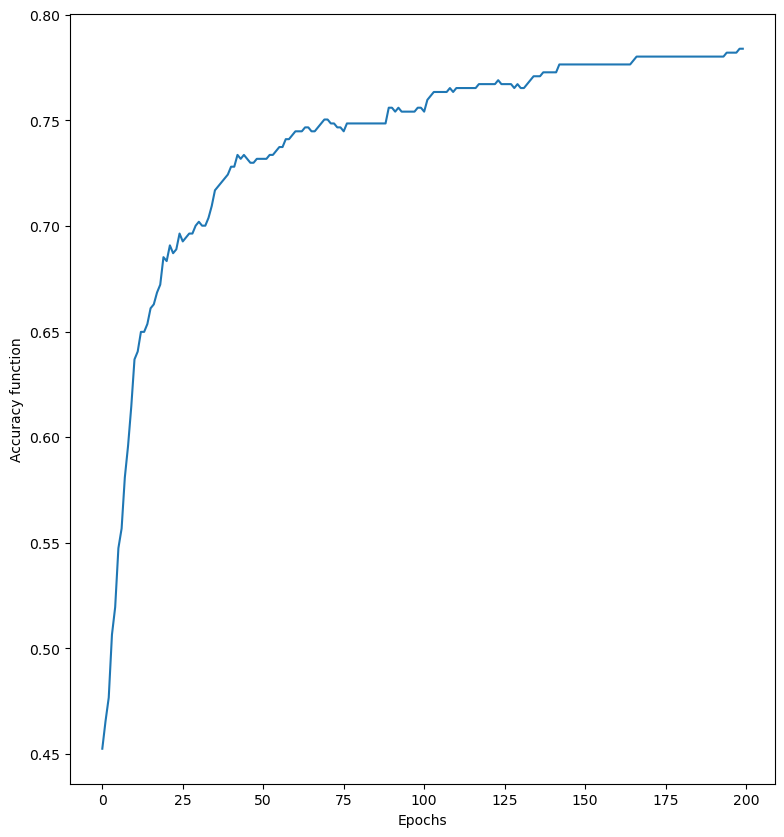

In [11]:
#Ver el performance del modelo en el entrenamiento (accuracy)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(model_history.history['accuracy'])
plt.xlabel('Epochs'),plt.ylabel('Accuracy function')


In [12]:
#Usar el modelo para predecir
Y_pred = model.predict(X_test) #predecir en términos de decimales
Y_prob = (model.predict(X_test) > 0.5).astype("int32") #en términos de 1 y 0


8/8 [==============================] - 0s 893us/step


In [13]:
Y_pred

array([[0.30051076],
       [0.19685386],
       [0.0935064 ],
       [0.2949714 ],
       [0.5061127 ],
       [0.5061056 ],
       [0.03976296],
       [0.4775092 ],
       [0.67727715],
       [0.71772856],
       [0.31514725],
       [0.84415114],
       [0.439619  ],
       [0.3933342 ],
       [0.08532152],
       [0.48047757],
       [0.14002241],
       [0.0659976 ],
       [0.73351246],
       [0.46232137],
       [0.25718832],
       [0.09348354],
       [0.5976339 ],
       [0.0902436 ],
       [0.62283885],
       [0.8914888 ],
       [0.10741384],
       [0.05050633],
       [0.2741263 ],
       [0.12196137],
       [0.7483252 ],
       [0.79139316],
       [0.78427184],
       [0.70534676],
       [0.5900528 ],
       [0.69657284],
       [0.93605894],
       [0.29382208],
       [0.46683964],
       [0.5857623 ],
       [0.06011493],
       [0.5904633 ],
       [0.57703084],
       [0.39308643],
       [0.06049524],
       [0.6244854 ],
       [0.71757996],
       [0.192

In [14]:
Y_prob

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [15]:
#métricas de performance
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score) #mientras más grandes mejor

#métricas en el train
accu_train = accuracy_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
prec_train = precision_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
reca_train = recall_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))

#métricas en el test
accu_test = accuracy_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
prec_test = precision_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
reca_test = recall_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

8/8 [==============================] - 0s 712us/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.784 	 0.722 	 0.622
  Test 	 0.732 	 0.610 	 0.625


**Ejemplo Multiclase**

- Aunque las salidas de la red neuronal están limitadas a un rango de valores entre 0 y 1, no se garantiza que la suma de estos sea igual a 1
- Transformar las salidas para que puedan ser usadas como probabilidades ayuda mucho a la interpretabilidad de las predicciones
- Transformación Softmax

$$\hat{p}_{l,i}^{*} = \frac{e^{\hat{y}_{l,i}}}{\sum{e^{\hat{y}_{l,i}}}}$$

- $\hat{y}_{1}=0.25$, $\hat{y}_{2}=0.76$, $\hat{y}_{3}=0.1$

- $\hat{p}_{1}=0.3099$, $\hat{p}_{2}=0.4717$, $\hat{p}_{3}=0.2184$

In [16]:
#Librerías
import pandas as pd
from sklearn import datasets
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
#from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD, Adam
#from tensorflow.keras.optimizers import SGD

In [17]:
#Datos
iris = datasets.load_iris()
X = iris.data
Y = iris.target
Y #tres tipos de flores

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [19]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
#creamos la variable target a dummies para poderla trabajar en la red neuronal
dummy_y = to_categorical(Y).astype(int)

In [21]:
dummy_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [22]:
#Dividimos los datos en test y train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y,
                                                    test_size=0.2, random_state=42)

In [26]:
#Construcción de la red neuronal

# neural network structure
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))#salida

#Gradiente descendente
learning_rate=0.1
epochs = 200
momentum = 0.8
sgd = SGD(learning_rate=learning_rate, momentum=momentum)

# configuracion del optimizador
model.compile(loss='categorical_crossentropy',#funcion de costo
              optimizer=sgd,#gradiente descendente
              metrics=['accuracy'])



history = model.fit(X_train, y_train, 
                   epochs=epochs, 
                   batch_size=100, 
                   validation_data=(X_test,y_test))


Epoch 1/200
2/2 [==============================] - 2s 2s/step - loss: 1.0924 - accuracy: 0.3333 - val_loss: 1.2044 - val_accuracy: 0.2333
Epoch 2/200
2/2 [==============================] - 0s 25ms/step - loss: 1.1471 - accuracy: 0.3500 - val_loss: 1.4865 - val_accuracy: 0.3333
Epoch 3/200
2/2 [==============================] - 0s 21ms/step - loss: 1.4082 - accuracy: 0.2667 - val_loss: 2.3115 - val_accuracy: 0.3667
Epoch 4/200
2/2 [==============================] - 0s 27ms/step - loss: 2.4705 - accuracy: 0.3917 - val_loss: 0.7211 - val_accuracy: 0.7000
Epoch 5/200
2/2 [==============================] - 0s 19ms/step - loss: 0.8182 - accuracy: 0.5917 - val_loss: 0.8283 - val_accuracy: 0.4000
Epoch 6/200
2/2 [==============================] - 0s 23ms/step - loss: 0.7529 - accuracy: 0.6250 - val_loss: 0.5956 - val_accuracy: 0.7000
Epoch 7/200
2/2 [==============================] - 0s 21ms/step - loss: 0.6317 - accuracy: 0.6583 - val_loss: 0.5224 - val_accuracy: 0.7000
Epoch 8/200
2/2 [=====

2/2 [==============================] - 0s 27ms/step - loss: 0.1560 - accuracy: 0.9583 - val_loss: 0.1521 - val_accuracy: 0.9667
Epoch 118/200
2/2 [==============================] - 0s 19ms/step - loss: 0.1543 - accuracy: 0.9667 - val_loss: 0.1478 - val_accuracy: 1.0000
Epoch 119/200
2/2 [==============================] - 0s 29ms/step - loss: 0.1479 - accuracy: 0.9750 - val_loss: 0.1565 - val_accuracy: 0.9667
Epoch 120/200
2/2 [==============================] - 0s 21ms/step - loss: 0.1531 - accuracy: 0.9750 - val_loss: 0.1653 - val_accuracy: 0.9667
Epoch 121/200
2/2 [==============================] - 0s 21ms/step - loss: 0.1633 - accuracy: 0.9667 - val_loss: 0.1413 - val_accuracy: 0.9667
Epoch 122/200
2/2 [==============================] - 0s 21ms/step - loss: 0.1429 - accuracy: 0.9667 - val_loss: 0.1604 - val_accuracy: 0.9667
Epoch 123/200
2/2 [==============================] - 0s 23ms/step - loss: 0.1643 - accuracy: 0.9583 - val_loss: 0.2782 - val_accuracy: 0.8000
Epoch 124/200
2/2 [=

Epoch 175/200
2/2 [==============================] - 0s 25ms/step - loss: 0.1332 - accuracy: 0.9750 - val_loss: 0.2030 - val_accuracy: 0.9000
Epoch 176/200
2/2 [==============================] - 0s 23ms/step - loss: 0.1871 - accuracy: 0.9250 - val_loss: 0.1561 - val_accuracy: 0.9667
Epoch 177/200
2/2 [==============================] - 0s 22ms/step - loss: 0.1552 - accuracy: 0.9583 - val_loss: 0.1356 - val_accuracy: 0.9667
Epoch 178/200
2/2 [==============================] - 0s 23ms/step - loss: 0.1310 - accuracy: 0.9750 - val_loss: 0.1724 - val_accuracy: 0.9333
Epoch 179/200
2/2 [==============================] - 0s 23ms/step - loss: 0.1799 - accuracy: 0.9417 - val_loss: 0.1460 - val_accuracy: 0.9667
Epoch 180/200
2/2 [==============================] - 0s 19ms/step - loss: 0.1497 - accuracy: 0.9583 - val_loss: 0.1049 - val_accuracy: 0.9667
Epoch 181/200
2/2 [==============================] - 0s 25ms/step - loss: 0.1230 - accuracy: 0.9583 - val_loss: 0.1048 - val_accuracy: 1.0000
Epoch 

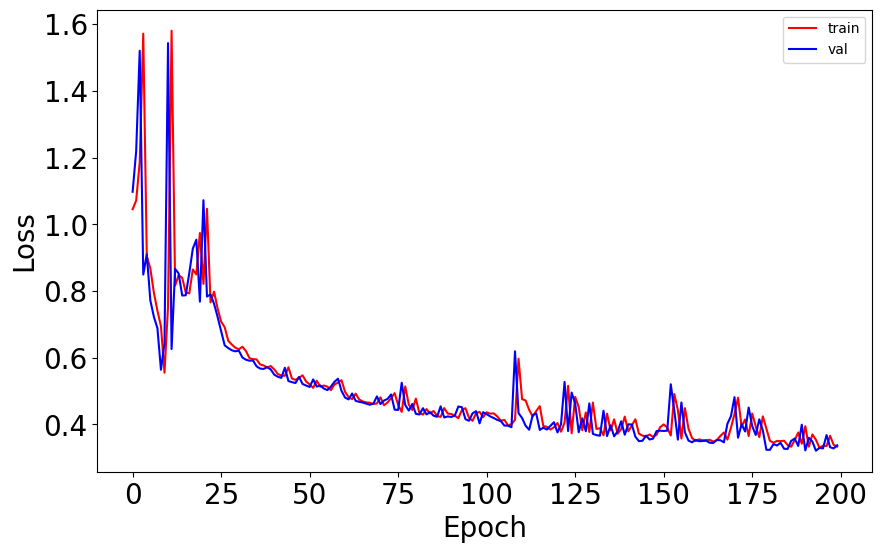

In [27]:
#Graficar el categorical crossentropy
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [28]:
#Predecir con el modelo
Y_pred = model.predict(X_test)
Y_prob = (model.predict(X_test) > 0.5).astype("int32")

1/1 [==============================] - 0s 15ms/step


In [29]:
Y_pred

array([[7.87833585e-07, 9.16214883e-01, 8.37843269e-02],
       [9.61140692e-01, 3.88326682e-02, 2.66525713e-05],
       [4.37267296e-24, 9.42725106e-04, 9.99057233e-01],
       [2.26978216e-07, 8.85664940e-01, 1.14334889e-01],
       [4.16072425e-07, 9.01565790e-01, 9.84337479e-02],
       [9.61140692e-01, 3.88326682e-02, 2.66525713e-05],
       [1.14989206e-02, 9.82530177e-01, 5.97092323e-03],
       [7.96284696e-13, 2.39125177e-01, 7.60874808e-01],
       [1.54588464e-09, 6.69473529e-01, 3.30526471e-01],
       [7.15996837e-04, 9.86056447e-01, 1.32275242e-02],
       [2.41986362e-11, 4.15265828e-01, 5.84734142e-01],
       [9.61140692e-01, 3.88326682e-02, 2.66525713e-05],
       [9.61140692e-01, 3.88326682e-02, 2.66525713e-05],
       [9.61140692e-01, 3.88326682e-02, 2.66525713e-05],
       [9.61140692e-01, 3.88326682e-02, 2.66525713e-05],
       [6.36144932e-07, 9.11536396e-01, 8.84629115e-02],
       [1.01239198e-17, 2.38511991e-02, 9.76148784e-01],
       [2.17320470e-04, 9.81320

In [30]:
Y_prob

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [31]:
#Hacer ingenería en reversa, para dejar las predicciones en el formato original que teníamos de las "Y"
uniques, ids = np.unique(Y, return_inverse=True)
dummy_y = to_categorical(ids, len(uniques))
reverse = uniques[dummy_y.argmax(1)]
X_train, X_test, y_train, y_test = train_test_split(X, reverse,
                                                    test_size=0.2, random_state=42)

In [32]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [33]:
#Métricas de performance
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)

#métricas en el train
Y_proba= model.predict(X_train)
Y_pred= np.argmax(Y_proba, axis=1)

accu_train = accuracy_score(y_train, Y_pred)
prec_train = precision_score(y_train, Y_pred,average='weighted')
reca_train = recall_score(y_train, Y_pred,average='weighted')


#métricas en el test
Y_proba= model.predict(X_test)
Y_pred= np.argmax(Y_proba, axis=1)

accu_test = accuracy_score(y_test, Y_pred)
prec_test = precision_score(y_test, Y_pred,average='weighted')
reca_test = recall_score(y_test, Y_pred,average='weighted')
print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

1/1 [==============================] - 0s 13ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.967 	 0.967 	 0.967
  Test 	 0.967 	 0.970 	 0.967
